##### Imports

In [1]:
"""
Focus on human data primarily on hIVSCC-MET for AIBS
-Tree call for Mouse
-Seurat prediction score for Human

*Make a scatter plot NMS score vs Seurat prediction score (Add n values) --DONE
1) RNA amp pass --DONE
2) RNA amp fail --DONE
*Make same plot as Agata with barplot -- DONE

Collaborators have hIVSCC-MET and hIVSCC-METx


*Look at the RNA Fail/NMS pass data core vs the rest to see what separates them
"""

'\nFocus on human data primarily on hIVSCC-MET for AIBS\n-Tree call for Mouse\n-Seurat prediction score for Human\n\n*Make a scatter plot NMS score vs Seurat prediction score (Add n values) --DONE\n1) RNA amp pass --DONE\n2) RNA amp fail --DONE\n*Make same plot as Agata with barplot -- DONE\n\nCollaborators have hIVSCC-MET and hIVSCC-METx\n\n\n*Look at the RNA Fail/NMS pass data core vs the rest to see what separates them\n'

In [2]:
import pandas as pd
import numpy as np
import csv
import logging
import os
from scipy.stats import pearsonr

from functions.temp_funcs import read_file, merge_dataframes, drop_cols, drop_nans, filter_date_range, \
filter_df, create_container_col, create_cond_df, create_container_df

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

sns.set(context = "notebook", style = "ticks", font="verdana", font_scale = 1.9)
pd.set_option("display.max_colwidth",150) #Expands the number of characters shown in the columns
pd.set_option('display.max_columns', None)

##### Paths

In [3]:
path = "C:/Users/kumar/Documents/Github/analysis_projects/analysis_scripts/"
csv_path = os.path.join(path, "csv/")
excel_path = os.path.join(path, "excel/")
plot_path = os.path.join(path, "rna_plot/AIBS/")
path_shiny_human = os.path.join(csv_path, "current_shiny_human.csv")

##### Filtering shiny dataframe

In [4]:
fields_shiny = ["cell_name", "cell_specimen_project", "Norm_Marker_Sum.0.4_label",
                "marker_sum_norm_label", "rna_amplification_pass_fail",
                "percent_cdna_longer_than_400bp", "amplified_quantity_ng", "sample_id", 
                "Tree_call", "seurat_prediction_score_label"]

shiny_dict = {"Norm_Marker_Sum.0.4_label" : "NMS Pass/Fail",
              "rna_amplification_pass_fail" : "RNA Amp Pass/Fail",
              "marker_sum_norm_label": "NMS score",
              "percent_cdna_longer_than_400bp" : "cDNA quality (%>400 bp)",
              "amplified_quantity_ng" : "Amplified content (ng)",
              "seurat_prediction_score_label": "Seurat prediction score"}

collaborator_dict = {"PG" : "Gabor", "PH" : "Mansvelder"}
for collab in ["P1", "P2", "P6", "P7", "P8", "P9", "PA", "PB", "PE", "PF", "PX", "P3", "P0", "P5"]:
    collaborator_dict[collab] = "AIBS"

In [5]:
shiny_human = read_file(path_shiny_human, fields_shiny) #3592 rows
shiny_human.rename(columns=shiny_dict, inplace=True)
shiny_human["NMS Pass/Fail"] = shiny_human["NMS Pass/Fail"].replace({True: "Pass", False: "Fail"}) #Changing to keep same format
shiny_human["RNA Amp Pass/Fail"] = shiny_human["RNA Amp Pass/Fail"].replace({"Pass": "RNA Amp Pass", "Fail": "RNA Amp Fail"})

INFO:functions.temp_funcs:Read file in as a pandas dataframe


In [6]:
shiny_human = create_container_df(shiny_human, "sample_id") #Create "P1"
shiny_human["collaborator_label"] = shiny_human["collaborator_label"].replace(collaborator_dict) #3592 rows
shiny_aibs = filter_df(shiny_human, "collaborator_label", "AIBS") 

shiny_aibs.dropna(subset=["NMS score", "Seurat prediction score", "cell_specimen_project"], inplace=True)
shiny_aibs.drop(columns=["cDNA quality (%>400 bp)", "Amplified content (ng)"], inplace=True) #2522 rows

INFO:functions.temp_funcs:Filtered dataframe based on collaborator_label == AIBS
C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [7]:
shiny_aibs["cell_specimen_project"].unique()

array(['hIVSCC-MET', 'H301x', 'hMPATCH', 'H301', 'hIVSCC-METx',
       'hIVSCC-METc', 'APL401Ax', 'qIVSCC-METa', 'qIVSCC-METc'],
      dtype=object)

In [8]:
shiny_aibs = shiny_aibs[(shiny_aibs["cell_specimen_project"] ==  "hIVSCC-MET") | \
                        (shiny_aibs["cell_specimen_project"] ==  "hIVSCC-METx") | \
                        (shiny_aibs["cell_specimen_project"] ==  "hIVSCC-METc")] #1645 rows if only x, 1963 if c included

In [9]:
shiny_aibs

sample_id                  cell_name RNA Amp Pass/Fail  \
0     P1S4_190321_002_A01     H19.06.351.11.16.01.01      RNA Amp Pass   
1     P1S4_190321_003_A01     H19.06.351.11.16.01.03      RNA Amp Pass   
2     P2S4_171220_052_A01        H17.03.016.11.16.02      RNA Amp Pass   
3     P2S4_190321_056_A01     H19.06.351.11.16.02.06      RNA Amp Pass   
4     P8S4_171219_359_A01        H17.03.016.11.15.07      RNA Amp Pass   
5     P8S4_171220_356_A01        H17.03.016.11.09.06      RNA Amp Pass   
6     P8S4_180718_354_A01     H18.03.313.11.06.01.05      RNA Amp Pass   
7     P8S4_190122_353_A01     H19.03.302.11.15.01.03      RNA Amp Pass   
8     P8S4_190305_357_A01     H19.03.305.11.10.01.07      RNA Amp Pass   
9     P8S4_190311_351_A01     H19.03.306.11.12.01.01      RNA Amp Pass   
10    P8S4_190311_355_A01     H19.03.306.11.12.01.05      RNA Amp Pass   
11    P8S4_190321_353_A01     H19.06.351.11.06.01.02      RNA Amp Pass   
12    P8S4_190321_354_A01     H19.06.351.11.06.01.03      RNA Amp Pass   
13    P8S4_190603_352_A01     H19.06.356.11.07.02.03      RNA Amp Pass   
14    P9S4_180312_404_A01        H18.06.004.11.04.03      RNA Amp Pass   
15    P9S4_180320_411_A01        H18.03.005.11.11.04      RNA Amp Pass   
16    P9S4_180621_403_A01     H18.26.403.11.02.01.04      RNA Amp Pass   
17    PAS4_180321_451_A01        H18.03.005.11.04.01      RNA Amp Fail   
18    PES4_190305_660_A01     H19.03.305.11.08.01.11      RNA Amp Pass   
19    PES4_190709_664_A01     H19.03.315.11.09.01.06      RNA Amp Pass   
20    PES4_200204_660_A01     H20.03.303.11.03.01.05      RNA Amp Pass   
21    PFS4_190723_702_A01     H19.03.317.11.05.01.01      RNA Amp Pass   
29    P8S4_180611_356_A01        H18.06.358.11.06.01      RNA Amp Pass   
30    PAS4_190603_453_A01     H19.06.356.11.09.01.04      RNA Amp Pass   
31    PES4_200204_662_A01     H20.03.303.11.03.01.07      RNA Amp Pass   
32    P2S4_190108_051_A01     H19.03.301.11.05.01.01      RNA Amp Pass   
35    PFS4_190122_703_A01     H19.03.302.11.04.01.04      RNA Amp Pass   
38    P8S4_190321_357_A01     H19.06.351.11.06.01.06      RNA Amp Pass   
39    P8S4_190122_352_A01     H19.03.302.11.15.01.02      RNA Amp Pass   
40    P8S4_180816_357_A01     H18.06.363.11.06.02.07      RNA Amp Pass   
...                   ...                        ...               ...   
3554  PXS4_190607_654_A01  H19.06.356.21.05.01.01.05      RNA Amp Pass   
3555  PXS4_190610_351_A01  H19.06.356.21.05.02.01.01      RNA Amp Pass   
3556  PXS4_190610_651_A01  H19.06.356.21.05.05.01.01      RNA Amp Pass   
3557  PXS4_190610_655_A01  H19.06.356.21.05.05.01.05      RNA Amp Pass   
3558  PXS4_190610_656_A01  H19.06.356.21.05.05.01.06      RNA Amp Pass   
3559  PXS4_190610_657_A01  H19.06.356.21.05.05.01.07      RNA Amp Pass   
3560  PXS4_190610_660_A01  H19.06.356.21.05.05.01.10      RNA Amp Fail   
3561  PXS4_190611_659_A01  H19.06.356.21.06.06.01.09      RNA Amp Pass   
3562  PXS4_190612_301_A01        H19.06.358.99.01.01      RNA Amp Pass   
3563  PXS4_190612_302_A01        H19.06.358.99.01.02      RNA Amp Pass   
3564  PXS4_190613_002_A01  H19.06.356.21.06.03.01.02      RNA Amp Pass   
3565  PXS4_190613_352_A01  H19.06.356.21.06.04.01.02      RNA Amp Fail   
3566  PXS4_190613_653_A01  H19.06.356.99.03.01.01.03      RNA Amp Pass   
3567  PXS4_190620_303_A01     H19.06.358.1A.02.01.03      RNA Amp Pass   
3568  PXS4_190624_356_A01        H19.03.314.1A.01.06      RNA Amp Pass   
3569  PXS4_190624_652_A01        H19.03.314.1A.02.02      RNA Amp Pass   
3570  PXS4_190624_655_A01        H19.03.314.1A.02.05      RNA Amp Pass   
3571  PXS4_190710_301_A01        H19.03.315.12.01.01      RNA Amp Pass   
3572  PXS4_190716_355_A01        H19.03.315.1A.01.05      RNA Amp Fail   
3573  PXS4_190722_651_A01        H19.03.316.2A.03.01      RNA Amp Pass   
3574  PXS4_190722_656_A01        H19.03.316.2A.03.06      RNA Amp Pass   
3575  PXS4_190723_353_A01        H19.03.315.1A.05.01      RNA Amp Pass   
3576  PXS4_190723_35

##### Creating count_rn for countplot

In [13]:
shinyh_npass = filter_df(shiny_aibs, "NMS Pass/Fail", "Pass")
shinyh_nfail = filter_df(shiny_aibs, "NMS Pass/Fail", "Fail")
shinyh_rpass = filter_df(shiny_aibs, "RNA Amp Pass/Fail", "RNA Amp Pass")
shinyh_rfail = filter_df(shiny_aibs, "RNA Amp Pass/Fail", "RNA Amp Fail")

INFO:functions.temp_funcs:Filtered dataframe based on NMS Pass/Fail == Pass
INFO:functions.temp_funcs:Filtered dataframe based on NMS Pass/Fail == Fail
INFO:functions.temp_funcs:Filtered dataframe based on RNA Amp Pass/Fail == RNA Amp Pass
INFO:functions.temp_funcs:Filtered dataframe based on RNA Amp Pass/Fail == RNA Amp Fail


In [14]:
rfail_nfail = filter_df(shinyh_rfail, "NMS Pass/Fail", "Fail")
rfail_npass = filter_df(shinyh_rfail, "NMS Pass/Fail", "Pass")
rpass_nfail = filter_df(shinyh_rpass, "NMS Pass/Fail", "Fail")
rpass_npass = filter_df(shinyh_rpass, "NMS Pass/Fail", "Pass")

INFO:functions.temp_funcs:Filtered dataframe based on NMS Pass/Fail == Fail
INFO:functions.temp_funcs:Filtered dataframe based on NMS Pass/Fail == Pass
INFO:functions.temp_funcs:Filtered dataframe based on NMS Pass/Fail == Fail
INFO:functions.temp_funcs:Filtered dataframe based on NMS Pass/Fail == Pass


In [15]:
rfail_nfail["Group"] = "RNA Amp Fail/NMS Fail"
rfail_npass["Group"] = "RNA Amp Fail/NMS Pass"
rpass_nfail["Group"] = "RNA Amp Pass/NMS Fail"
rpass_npass["Group"] = "RNA Amp Pass/NMS Pass"

C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [16]:
count_rn = pd.concat([rfail_nfail, rfail_npass, rpass_nfail, rpass_npass])

count_rn.drop(columns=["sample_id", "RNA Amp Pass/Fail", "NMS score", "NMS Pass/Fail",
                       "Seurat prediction score", "collaborator_label"], inplace=True)

count_rn["Group_count"] = count_rn.groupby(["Group", "Tree_call"])["Tree_call"].transform("count")
count_rn["Group_total"] = count_rn.groupby("Group")["Tree_call"].transform("count")
count_rn["proportion"] = count_rn["Group_count"] / count_rn["Group_total"]

new_piv = pd.pivot_table(count_rn, values='proportion', index=["Group"], columns="Tree_call", fill_value=0)

In [17]:
new_piv

Tree_call                  Core        I1        I2        I3     PoorQ
Group                                                                  
RNA Amp Fail/NMS Fail  0.000000  0.000000  0.000000  0.000000  1.000000
RNA Amp Fail/NMS Pass  0.088496  0.026549  0.053097  0.017699  0.814159
RNA Amp Pass/NMS Fail  0.008696  0.000000  0.004348  0.000000  0.986957
RNA Amp Pass/NMS Pass  0.440845  0.228873  0.170423  0.007042  0.152817

##### Plot Colors

In [18]:
pf_colors={"Pass": "#41ab5d", "Fail": "#ef3b2c"}
tree_colors={"Core": "#41ab5d", "I1": "#2171b5", "I2": "#4292c6", "I3": "#6baed6", "PoorQ": "#ef3b2c"}

##### FacetGrid Plots

Text(0.5,0.98,'RNA/NMS Pass vs. Fail')

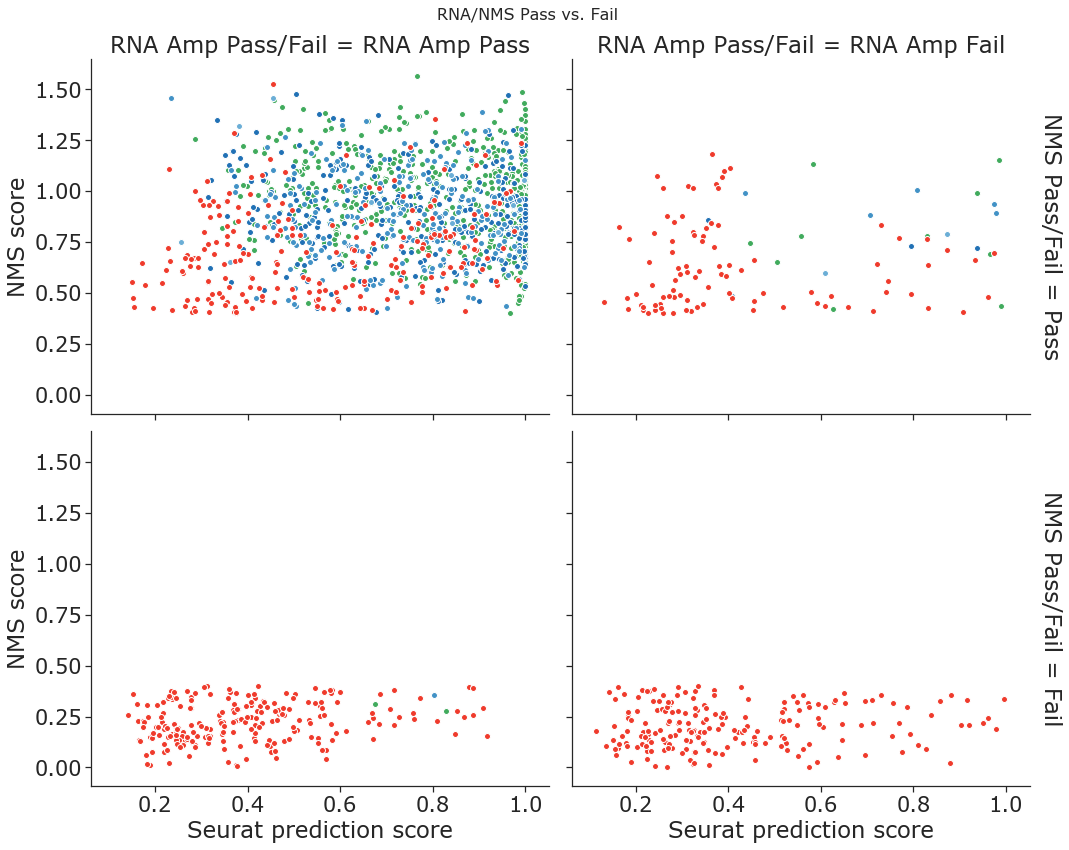

In [26]:
g = sns.FacetGrid(data=shiny_aibs, col="RNA Amp Pass/Fail", row="NMS Pass/Fail", height=6, aspect=1.2,
                  hue="Tree_call", hue_order=tree_colors, palette=tree_colors, margin_titles=True)
g = g.map(plt.scatter, "Seurat prediction score", "NMS score", edgecolor="w")
g.fig.subplots_adjust(wspace=0.05, hspace=0.05, top=0.92)
plt.suptitle("RNA/NMS Pass vs. Fail", size=16)
#plt.savefig(plot_path + "AIBS_facplot_rna_nms_all.jpeg", bbox_inches="tight")

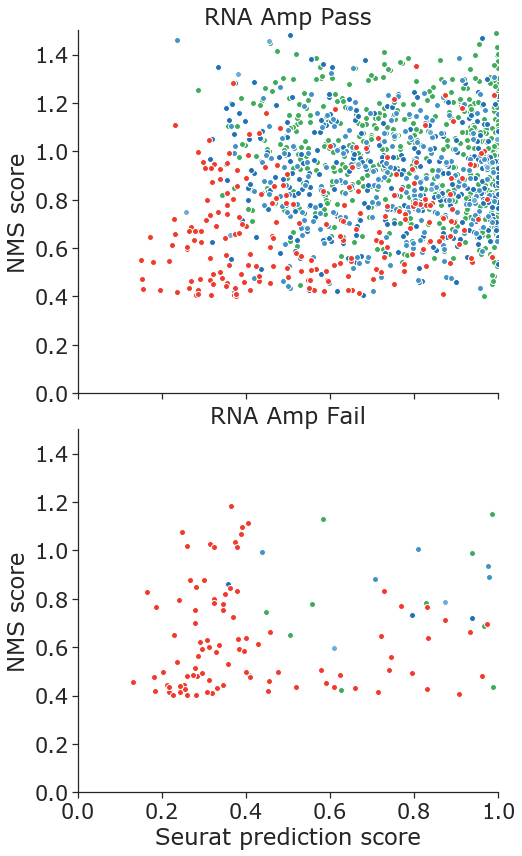

In [30]:
g = sns.FacetGrid(data=shinyh_npass, row="RNA Amp Pass/Fail", height=6, aspect=1.2,
                  hue="Tree_call", hue_order=tree_colors, palette=tree_colors)
g = g.map(plt.scatter, "Seurat prediction score", "NMS score", edgecolor="w")
g.set_titles("{row_name}")         
g.fig.subplots_adjust(wspace=0.05, hspace=0.1)

plt.xlim(0, 1)
plt.ylim(0, 1.5)
#plt.suptitle("RNA Pass vs. Fail (NMS Pass)", size=16)
plt.savefig(plot_path + "AIBS_facplot_rna_pass_fail_nms_pass.jpeg", bbox_inches="tight")

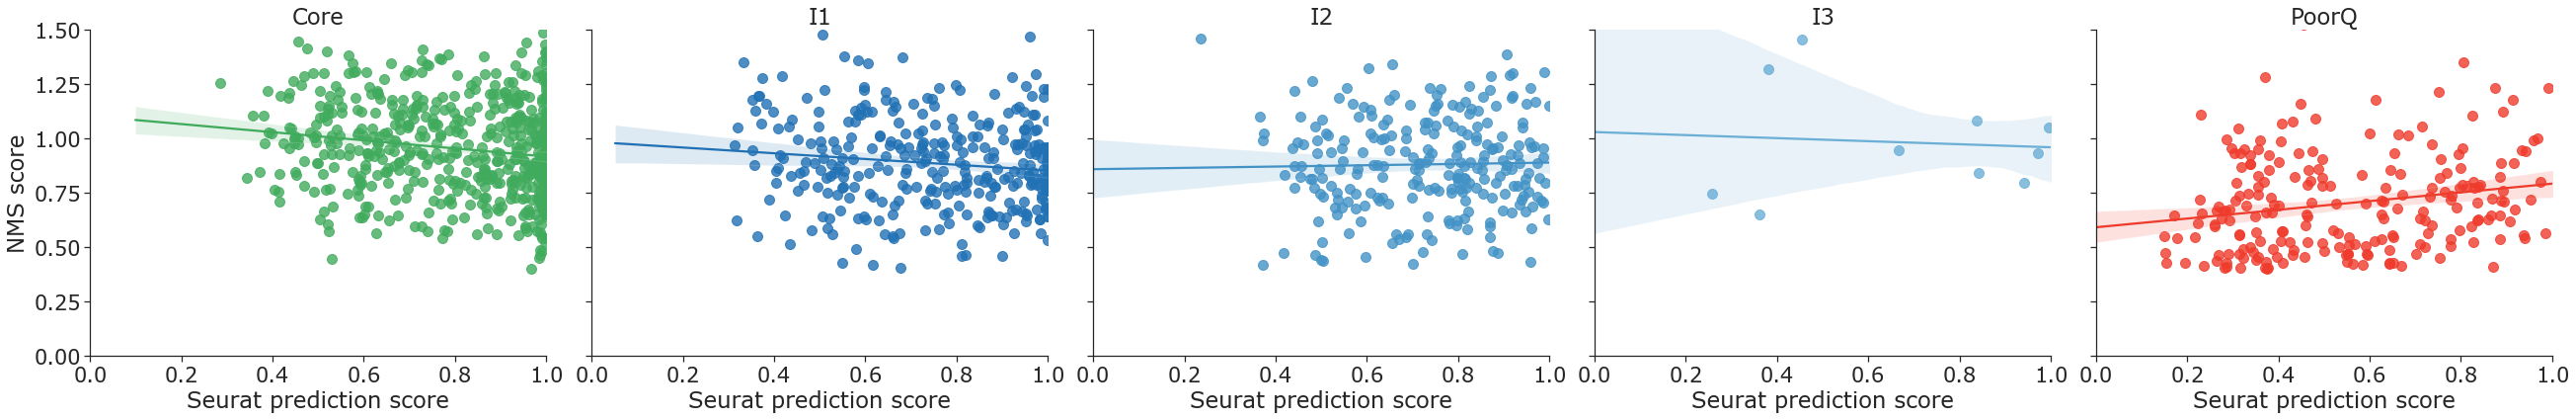

In [23]:
g = sns.lmplot(x="Seurat prediction score", y="NMS score", data=rpass_npass,
               col="Tree_call", hue="Tree_call", col_order=tree_colors, 
               height=6, aspect=1.2, palette=tree_colors, scatter_kws={"s": 100})
g.set_titles("{col_name}")
g.fig.subplots_adjust(wspace=0.10)

plt.xlim(0, 1)
plt.ylim(0, 1.5)
plt.savefig(plot_path + "AIBS_lmplot_rna_pass_nms_pass.jpeg", bbox_inches="tight")

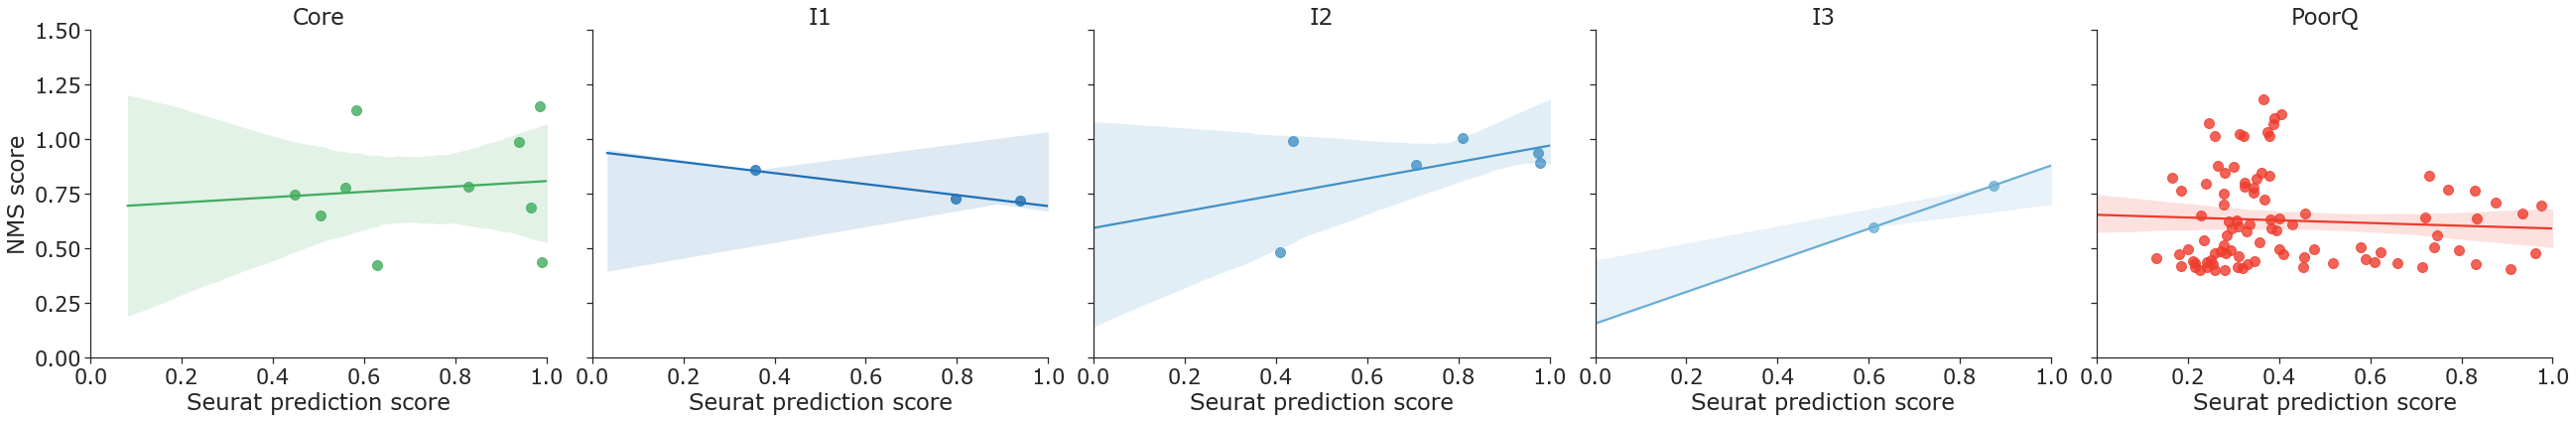

In [25]:
g = sns.lmplot(x="Seurat prediction score", y="NMS score", data=rfail_npass,
               col="Tree_call", hue="Tree_call", col_order=tree_colors, 
               height=6, aspect=1.2, palette=tree_colors, scatter_kws={"s": 100})
g.set_titles("{col_name}")
g.fig.subplots_adjust(wspace=0.10)

plt.xlim(0, 1)
plt.ylim(0, 1.5)
plt.savefig(plot_path + "AIBS_lmplot_rna_fail_nms_pass.jpeg", bbox_inches="tight")

##### JointPlots (NMS Pas): RNA Pass vs. Fail

In [ ]:
corr = pearsonr(rpass_npass["Seurat prediction score"], rpass_npass["NMS score"])
corr = [np.round(c, 2) for c in corr]
text = f"r={corr[0]}"
ax = sns.jointplot(x="Seurat prediction score", y="NMS score", data=rpass_npass, kind="reg", color="#41ab5d", height=7)

plt.text(0.1, 1.4, text, fontsize=12)
plt.xlim(0, 1)
plt.ylim(0, 1.5)
#plt.savefig(plot_path + "AIBS_jointplot_rna_pass_nms_pass.jpeg", bbox_inches="tight")

In [ ]:
corr = pearsonr(rfail_npass["Seurat prediction score"], rfail_npass["NMS score"])
corr = [np.round(c, 2) for c in corr]
text = f"r={corr[0]}"
ax = sns.jointplot(x="Seurat prediction score", y="NMS score", data=rfail_npass, kind="reg", color="#ef3b2c", height=7)

plt.text(0.1, 1.4, text, fontsize=12)
plt.xlim(0, 1)
plt.ylim(0, 1.5)
#plt.savefig(plot_path + "AIBS_jointplot_rna_fail_nms_pass.jpeg", bbox_inches="tight")

##### Countplot: RNA/NMS Groups

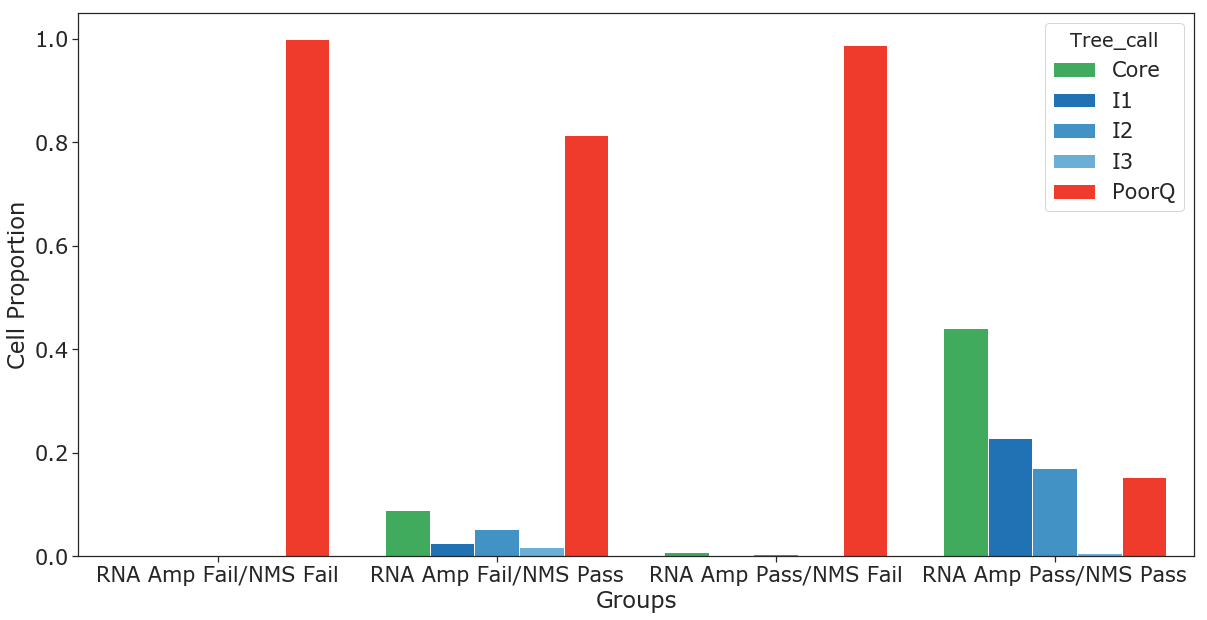

In [35]:
fig_dims = (20, 10)
f, axes = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="Group", y="proportion", data=count_rn, 
                 hue="Tree_call", hue_order=tree_colors, palette=tree_colors, saturation=1)
ax.set(xlabel="Groups", ylabel="Cell Proportion")
plt.xticks(rotation=0)

"""
core = [0, 10, 1, 537]
i1 = [0, 3, 0, 256]
i2 = [0, 6, 1, 186]
i3 = [0, 2, 0, 8]
poorq = [174, 48, 166, 91]
count_list = core + i1 + i2 + i3 + poorq

i=0
for p in ax.patches:
    top_rect = p.get_height() + 0.01
    mid_rect = p.get_x() + p.get_width()/2
    label_rect = count_list[i]
    ax.text(mid_rect, top_rect, label_rect,
            ha="center", size="medium", color='black', weight='bold')
    i += 1"""

plt.savefig(plot_path + "AIBS_countplot_rna_groups.jpeg", bbox_inches="tight")

##### Stacked BarPlot: RNA/NMS Groups

def stacked_plot(df):
    groups_order = ["RNA Fail/NMS Fail", "RNA Fail/NMS Pass", "RNA Pass/NMS Fail", "RNA Pass/NMS Pass"]
    tree_order = ["Core", "I1", "I2", "PoorQ"]
    ax = df.loc[groups_order].plot(kind="bar", stacked = True, figsize= (8,11), rot = 0,
                                   colormap=ListedColormap(sns.color_palette("RdYlGn_r", 12)),width = 0.4)

    ax.legend(tree_order, loc = 0, bbox_to_anchor = (1, 1.02), frameon = True, shadow = True, fontsize = 13)
    ax.set(xlabel = "Groups", ylabel = "Cell Proportion")
    
    i=0
    count_list = ["n=102", "n=47", "n=28", "n=113"]
    #count_list = ["n=102", "n=47", "n=24", "n=110"]
    
    rects = ax.patches
    labels = count_rn.Group_total.value_counts()
    
    for p, label in zip (rects, labels):
        top_rect = 1 + 0.01
        mid_rect = p.get_x() + p.get_width()/2
        label_rect = count_list[i]
        ax.text(x=mid_rect, y=top_rect, s=label_rect,
                ha="center", size="medium", color="black", weight="bold")
        i += 1
    plt.savefig(plot_path + "AIBS_stackplot_rna_groups.jpeg", bbox_inches="tight")
        
stacked_plot(new_piv)

##### Misc

In [ ]:
g = sns.FacetGrid(data=shinyh, col="RNA Pass/Fail", row="NMS Pass/Fail", height=6, aspect=1.2,
                  hue="Tree_call", hue_order=tree_colors, palette=tree_colors, margin_titles=True)
g = g.map(plt.scatter, "Seurat prediction score", "NMS score", edgecolor="w") \
         .fig.subplots_adjust(wspace=0.05, hspace=0.05, top=0.92)
plt.suptitle("RNA/NMS Pass vs. Fail", size=16)
plt.savefig(plot_path + "RNA_facplot_rna_nms_all.jpeg", bbox_inches="tight")

In [ ]:
g = sns.FacetGrid(data=shinyh, row="RNA Pass/Fail", height=6, aspect=1.2,
                  hue="Tree_call", hue_order=tree_colors, palette=tree_colors, margin_titles=True)
g = g.map(plt.scatter, "Seurat prediction score", "NMS score", edgecolor="w") \
         .fig.subplots_adjust(wspace=0.05, hspace=0.05, top=0.95)
plt.suptitle("RNA Pass vs. Fail (NMS Pass & Fail included)", size=16)
plt.savefig(plot_path + "RNA_facplot_rna_pass_fail_all_nms.jpeg", bbox_inches="tight")

In [ ]:
g = sns.lmplot(x="Seurat prediction score", y="NMS score", data=shinyh_rpass,
               col="Tree_call", hue="Tree_call", col_order=tree_colors, 
               height=6, aspect=1.2, palette=tree_colors)
plt.xlim(0, 1)
plt.ylim(0, 1.5)
g.set_titles("{col_name}")
plt.savefig(plot_path + "RNA_lmplot_rna_pass_all_nms.jpeg", bbox_inches="tight")

In [ ]:
g = sns.lmplot(x="Seurat prediction score", y="NMS score", data=shinyh_rfail,
               col="Tree_call", hue="Tree_call", col_order=tree_colors, 
               height=6, aspect=1.2, palette=tree_colors)
plt.xlim(0, 1)
plt.ylim(0, 1.5)
g.set_titles("{col_name}")
plt.savefig(plot_path + "RNA_lmplot_rna_fail_all_nms.jpeg", bbox_inches="tight")

In [ ]:
g = sns.FacetGrid(data=shinyh_rpass, col="Tree_call", height=6, aspect=1.2, 
                  hue="Tree_call", col_order=tree_colors, palette=tree_colors)
g = g.map(plt.scatter, "Seurat prediction score", "NMS score", edgecolor="w") \
         .fig.subplots_adjust(wspace=0.05, hspace=0.05, top=0.88)
         #.add_legend() \
plt.savefig(plot_path + "RNA_facplot_rna_pass_all_nms.jpeg", bbox_inches="tight")

In [ ]:
g = sns.FacetGrid(data=shinyh_rfail, col="Tree_call", height=6, aspect=1.2, 
                  hue="Tree_call", col_order=tree_colors, palette=tree_colors)
g = g.map(plt.scatter, "Seurat prediction score", "NMS score", edgecolor="w") \
         .fig.subplots_adjust(wspace=0.05, hspace=0.05, top=0.88)
plt.savefig(plot_path + "RNA_facplot_rna_fail_all_nms.jpeg", bbox_inches="tight")

In [ ]:
g = sns.FacetGrid(data=shinyh_npass, row="RNA Pass/Fail", height=6, aspect=1.2,
                  hue="Tree_call", hue_order=tree_colors, palette=tree_colors, margin_titles=True)
g = g.map(plt.scatter, "Seurat prediction score", "NMS score", edgecolor="w") \
         .fig.subplots_adjust(wspace=0.05, hspace=0.05, top=0.95)
plt.xlim(0, 1)
plt.ylim(0, 1.5)
plt.suptitle("RNA Pass vs. Fail (NMS Pass)", size=16)
plt.savefig(plot_path + "RNA_facplot_rna_pass_fail_nms_pass.jpeg", bbox_inches="tight")

In [ ]:
g = sns.lmplot(x="Seurat prediction score", y="NMS score", data=rpass_npass,
               col="Tree_call", hue="Tree_call", col_order=tree_colors, 
               height=6, aspect=1.2, palette=tree_colors)
plt.xlim(0, 1)
plt.ylim(0, 1.5)
g.set_titles("{col_name}")
plt.savefig(plot_path + "RNA_lmplot_rna_pass_nms_pass.jpeg", bbox_inches="tight")

In [ ]:
g = sns.lmplot(x="Seurat prediction score", y="NMS score", data=rfail_npass,
               col="Tree_call", hue="Tree_call", col_order=tree_colors, 
               height=6, aspect=1.2, palette=tree_colors)
plt.xlim(0, 1)
plt.ylim(0, 1.5)
g.set_titles("{col_name}")
plt.savefig(plot_path + "RNA_lmplot_rna_fail_nms_pass.jpeg", bbox_inches="tight")

##### JointPlots

In [ ]:
corr = pearsonr(shinyh_rpass["Seurat prediction score"], shinyh_rpass["NMS score"])
corr = [np.round(c, 2) for c in corr]
text = f"r={corr[0]}"
ax = sns.jointplot(x="Seurat prediction score", y="NMS score", data=shinyh_rpass, kind="reg", color="#41ab5d", height=7)

plt.text(0.1, 1.4, text, fontsize=12)
plt.xlim(0, 1)
plt.ylim(0, 1.5)
#plt.savefig(plot_path + "jointplot_rna_pass.jpeg", bbox_inches="tight")

In [ ]:
corr = pearsonr(shinyh_rfail["Seurat prediction score"], shinyh_rfail["NMS score"])
corr = [np.round(c, 2) for c in corr]
text = f"r={corr[0]}"
ax = sns.jointplot(y="NMS score", x="Seurat prediction score", data=shinyh_rfail, kind="reg", color="#ef3b2c", height=7)

plt.text(0.1, 1.4, text, fontsize=12)
plt.xlim(0, 1)
plt.ylim(0, 1.5)
#plt.savefig(plot_path + "jointplot_rna_fail.jpeg", bbox_inches="tight")

##### ScatterPlots

In [ ]:
fig_dims = (10, 5)
f, axes = plt.subplots(figsize=fig_dims)

ax = sns.scatterplot(y="NMS score", x="Seurat prediction score", data=shinyh_rpass, 
                hue="Tree_call", hue_order=tree_colors, palette=tree_colors)
ax.set_title("RNA Pass (*NMS Pass & Fail included)")
plt.legend(bbox_to_anchor=(1.01, 1.025), loc=2, fancybox=True, shadow=True)

tree_list = {"Core": 538, "I1": 256, "I2": 187, "I3": 8, "PoorQ": 257}
l = [print(key, ":", value) for key, value in tree_list.items()]
plt.savefig(plot_path + "scaplot_rna_pass_all_nms.jpeg", bbox_inches="tight")

In [ ]:
fig_dims = (10, 5)
f, axes = plt.subplots(figsize=fig_dims)

ax = sns.scatterplot(y="NMS score", x="Seurat prediction score", data=rpass_npass, 
                hue="Tree_call", hue_order=tree_colors, palette=tree_colors)
ax.set_title("RNA Pass & NMS Pass")
plt.legend(bbox_to_anchor=(1.01, 1.025), loc=2, fancybox=True, shadow=True)

tree_list = {"Core": 537, "I1": 256, "I2": 186, "I3": 8, "PoorQ": 91}
l = [print(key, ":", value) for key, value in tree_list.items()]
plt.savefig(plot_path + "scaplot_rna_pass_nms_pass.jpeg", bbox_inches="tight")

In [ ]:
fig_dims = (10, 5)
f, axes = plt.subplots(figsize=fig_dims)

ax = sns.scatterplot(y="NMS score", x="Seurat prediction score", data=shinyh_rfail, 
                hue="Tree_call", hue_order=tree_colors, palette=tree_colors)
ax.set_title("RNA Fail (*NMS Pass & Fail included)")
plt.legend(bbox_to_anchor=(1.01, 1.025), loc=2, fancybox=True, shadow=True)

tree_list = {"Core": 10, "I1": 3, "I2": 6, "I3": 2, "PoorQ": 222}
l = [print(key, ":", value) for key, value in tree_list.items()]
plt.savefig(plot_path + "scaplot_rna_fail_all_nms.jpeg", bbox_inches="tight")

In [ ]:
fig_dims = (10, 5)
f, axes = plt.subplots(figsize=fig_dims)

ax = sns.scatterplot(y="NMS score", x="Seurat prediction score", data=rfail_npass, 
                hue="Tree_call", hue_order=tree_colors, palette=tree_colors)
ax.set_title("RNA Fail & NMS Fail")
plt.legend(bbox_to_anchor=(1.01, 1.025), loc=2, fancybox=True, shadow=True)

tree_list = {"Core": 10, "I1": 3, "I2": 6, "I3": 2, "PoorQ": 48}
l = [print(key, ":", value) for key, value in tree_list.items()]
plt.savefig(plot_path + "scaplot_rna_fail_nms_pass.jpeg", bbox_inches="tight")

##### RegPlots

In [ ]:
fig_dims = (10, 12)
f, axes = plt.subplots(nrows=3, ncols=1, figsize=fig_dims)

ax = sns.scatterplot(y="NMS score", x="Seurat prediction score", data=shinyh,
                     palette=pf_colors, hue="RNA Pass/Fail", ax=axes[0])

corr = pearsonr(shinyh_rpass["Seurat prediction score"], shinyh_rpass["NMS score"])
corr = [np.round(c, 2) for c in corr]
text = f"r={corr[0]}"

ax1 = sns.regplot(y="NMS score", x="Seurat prediction score", data=shinyh_rpass, color="#41ab5d", ax=axes[1])
ax.text(0.97, -0.4, text, fontsize=12)


corr = pearsonr(shinyh_rfail["Seurat prediction score"], shinyh_rfail["NMS score"])
corr = [np.round(c, 2) for c in corr]
text = f"r={corr[0]}"

ax2 = sns.regplot(y="NMS score", x="Seurat prediction score", data=shinyh_rfail, color="#ef3b2c", ax=axes[2])
ax.text(0.97, -2.4, text, fontsize=12)


ax.set(xticklabels=[])
ax1.set(xticklabels=[])
ax.set_xlabel("")
ax1.set_xlabel("")
plt.savefig(plot_path + "regplot_rna_pass_vs_fail_all_nms.jpeg", bbox_inches="tight")

In [ ]:
fig_dims = (10, 12)
f, axes = plt.subplots(nrows=3, ncols=1, figsize=fig_dims)

ax = sns.scatterplot(y="NMS score", x="Seurat prediction score", data=shinyh,
                     palette=pf_colors, hue="RNA Pass/Fail", ax=axes[0])

corr = pearsonr(rpass_npass["Seurat prediction score"], rpass_npass["NMS score"])
corr = [np.round(c, 2) for c in corr]
text = f"r={corr[0]}"

ax1 = sns.regplot(y="NMS score", x="Seurat prediction score", data=rpass_npass, color="#41ab5d", ax=axes[1])
ax.text(0.97, -0.4, text, fontsize=12)


corr = pearsonr(rfail_npass["Seurat prediction score"], rfail_npass["NMS score"])
corr = [np.round(c, 2) for c in corr]
text = f"r={corr[0]}"

ax2 = sns.regplot(y="NMS score", x="Seurat prediction score", data=rfail_npass, color="#ef3b2c", ax=axes[2])
ax.text(0.97, -2.4, text, fontsize=12)


ax.set(xticklabels=[])
ax1.set(xticklabels=[])
ax.set_xlabel("")
ax1.set_xlabel("")
plt.savefig(plot_path + "regplot_rna_pass_vs_fail_nms_pass.jpeg", bbox_inches="tight")

##### Countplot

fig_dims = (14, 10)
f, axes = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="Group", y="proportion", hue="Tree_call", data=count_rn, hue_order=tree_colors, palette="RdYlGn_r")
ax.set(xlabel="Groups", ylabel="Cell Proportion")

core = [0, 10, 1, 537]
i1 = [0, 3, 0, 256]
i2 = [0, 6, 1, 186]
i3 = [0, 2, 0, 8]
poorq = [174, 48, 166, 91]
count_list = core + i1 + i2 + i3 + poorq

i=0
for p in ax.patches:
    top_rect = p.get_height() + 0.01
    mid_rect = p.get_x() + p.get_width()/2
    label_rect = count_list[i]
    ax.text(mid_rect, top_rect, label_rect,
            ha="center", size="medium", color='black', weight='bold')
    i += 1

plt.savefig(plot_path + "countplot_rna_groups.jpeg", bbox_inches="tight")

##### Stacked BarPlot

def stacked_plot(df):
    groups_order = ["RNA Fail/NMS Fail", "RNA Fail/NMS Pass", "RNA Pass/NMS Fail", "RNA Pass/NMS Pass"]
    tree_order = ["Core", "I1", "I2", "I3", "PoorQ"]
    ax = df.loc[groups_order].plot(kind="bar", stacked = True, figsize= (8,11), rot = 0,
                                   colormap=ListedColormap(sns.color_palette("RdYlGn_r", 10)),width = 0.4)

    ax.legend(tree_order, loc = 0, bbox_to_anchor = (1, 1.02), frameon = True, shadow = True, fontsize = 13)
    ax.set(xlabel = "Groups", ylabel = "Cell Proportion")
    
    i=0
    count_list = ["n=174", "n=69", "n=168", "n=1078"]
    
    rects = ax.patches
    labels = count_rn.Group_total.value_counts()
    
    for p, label in zip (rects, labels):
        top_rect = 1 + 0.01
        mid_rect = p.get_x() + p.get_width()/2
        label_rect = count_list[i]
        ax.text(x=mid_rect, y=top_rect, s=label_rect,
                ha="center", size="medium", color="black", weight="bold")
        i += 1
    plt.savefig(plot_path + "stackplot_rna_groups.jpeg", bbox_inches="tight")
        
stacked_plot(new_piv)

##### Info

In [ ]:
print(f"RNA Fail/NMS Fail: {rfail_nfail.sample_id.count()}")
print(f"RNA Fail/NMS Pass: {rfail_npass.sample_id.count()}")
print(f"RNA Pass/NMS Fail: {rpass_nfail.sample_id.count()}")
print(f"RNA Pass/NMS Pass: {rpass_npass.sample_id.count()}")

In [ ]:
print(f"Rpass total count: {shinyh_rpass.sample_id.count()}")
print(f"Rfail total count: {shinyh_rfail.sample_id.count()}")

In [ ]:
rfail_nfail.Tree_call.value_counts(normalize=True) #rfail_nfail["Tree_call"].value_counts() / rfail_nfail["Tree_call"].count()
rfail_npass.Tree_call.value_counts(normalize=True)
rpass_nfail.Tree_call.value_counts(normalize=True)
rpass_npass.Tree_call.value_counts(normalize=True)

In [ ]:
count_rn["Group"].value_counts() / count_rn["Group"].count()

##### Counts

In [ ]:
aibs = filter_df(shinyh, "collaborator_label", "AIBS")
pg = filter_df(shinyh, "collaborator_label", "Gabor")
ph = filter_df(shinyh, "collaborator_label", "Mansvelder")
print(f"Human total count: {shinyh.sample_id.count()}")
print(f"AIBS count: {aibs.sample_id.count()}")
print(f"Gabor count: {pg.sample_id.count()}")
print(f"Mansvelder count: {ph.sample_id.count()}")